In [1]:
"""
Import packages
"""
import uproot
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

print("Your uproot version: ", uproot.__version__)
print("Info: uproot 4+ is recommended.")

f = uproot.open('/home/mfedkevych/Work/LZ/Simulations/Emergent_neutrons_AmBe_exact_geometry_with_outer_W_capsule/simulation_output/outcapsule.root')
f.classnames()



Your uproot version:  5.0.10
Info: uproot 4+ is recommended.


{'tcapsule;22': 'TTree', 'tcapsule;21': 'TTree'}

In [2]:
f['tcapsule;21'].show()

t = f['tcapsule;21']
rq = t.arrays(library='np')


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Eemission            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
nemission            | int32_t                  | AsDtype('>i4')
idpdgemission        | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
costhemission        | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
E0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
ncapsuleprimary      | int32_t                  | AsDtype('>i4')
x0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
y0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
z0capsule            | std::vector<double>      | AsJagged(AsDtype('>f8'), he...


In [3]:
EmergentNeutrons = rq['Eemission']
PrimaryNeutrons = rq['E0capsule']

print(len(PrimaryNeutrons))
EmergentNeutrons = np.concatenate( list(EmergentNeutrons), axis=0 )
PrimaryNeutrons = np.concatenate( list(PrimaryNeutrons), axis=0 )

EmergentNeutrons = EmergentNeutrons.flatten()
PrimaryNeutrons = PrimaryNeutrons.flatten()

print(type(EmergentNeutrons))
print(EmergentNeutrons)

print(len(PrimaryNeutrons))

9739926
<class 'numpy.ndarray'>
[2614.16650495 3162.4714967  4325.32539176 ... 8656.00677304 5206.83137174
 7191.82434856]
9739926


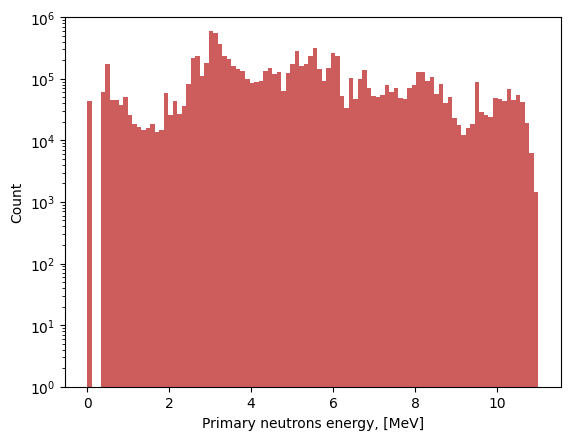

In [4]:
plt.hist(PrimaryNeutrons/1000, bins=100, color='indianred')
plt.xlabel('Primary neutrons energy, [MeV]')
plt.ylabel('Count')
#plt.xlim(0,1)
plt.ylim(1,1e6)
plt.yscale('log')
plt.savefig("Primary_neutrons_AmBe_with_outer_capsule.png", bbox_inches ='tight')
plt.show()

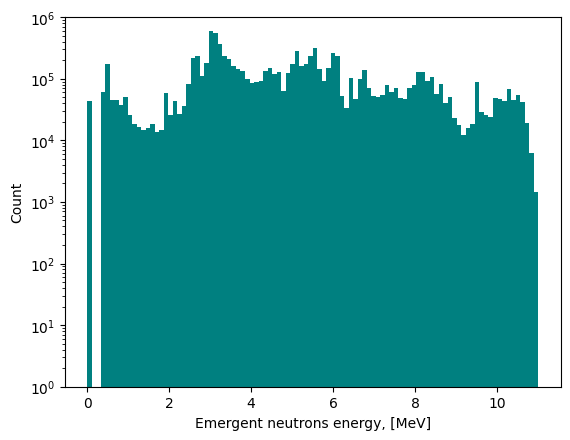

In [5]:
plt.hist(EmergentNeutrons/1000, bins=100, color='teal')
plt.xlabel('Emergent neutrons energy, [MeV]')
plt.ylabel('Count')
#plt.xlim(0,1)
plt.ylim(1,1e6)
plt.yscale('log')
plt.savefig("Emergent_neutrons_AmBe_with_outer_capsule.png", bbox_inches ='tight')
plt.show()

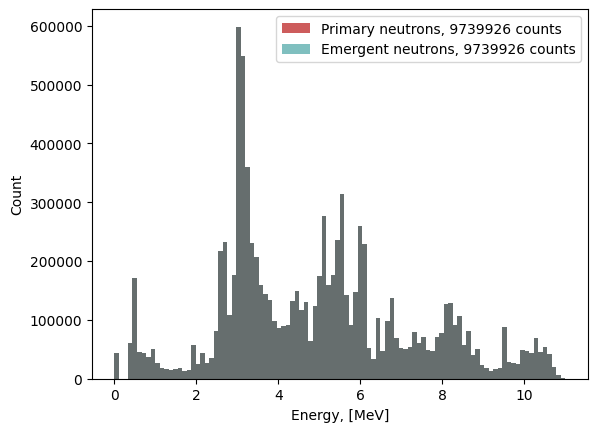

In [9]:
plt.hist(PrimaryNeutrons/1000, bins=100, color='indianred', label=r'Primary neutrons, {} counts'.format(len(PrimaryNeutrons)))
plt.hist(EmergentNeutrons/1000, bins=100, color='teal', alpha=0.5, label='Emergent neutrons, {} counts'.format(len(EmergentNeutrons)))
plt.xlabel('Energy, [MeV]')
plt.ylabel('Count')
plt.legend()

#plt.ylim(1,1e6)
#plt.xlim(0,0.012)
#plt.yscale('log')
plt.savefig("Primary__and_emergent_neutrons_AmBe_with_outer_capsule.png", bbox_inches ='tight')
plt.show()

In [ ]:
print(len(EmergentNeutrons)/len(PrimaryNeutrons))